## search by gene family or by gene list
## TODO: 
* add function of searching by gene list
* ignore case sensitive in gene family and gene list search

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.chdir('/Users/jplab/Desktop/DAILY_CODE_DATA/2022-4/data/4-27_FOX_family_mRNA_shnc')

In [3]:
deseq2Norm_counts = '/Users/jplab/Desktop/snakepipes_Data/results_mRNA_seq_FOXA1_KD_NC_2022221/featureCounts/counts_deseq2Normed_symbol.tsv'

df_deseq2Norm_counts = pd.read_csv(deseq2Norm_counts,header=0, sep='\t')

# for one gene family

In [ ]:
looking_for = "KRT"
df_deseq2Norm_counts = df_deseq2Norm_counts.dropna(subset=['external_gene_name'])
df_filtered = df_deseq2Norm_counts[df_deseq2Norm_counts["external_gene_name"].str.contains(looking_for)]
print(df_filtered['external_gene_name'].tolist)

# for **one** gene list

In [13]:
gene_list_name = 'genes in our data'
looking_for = {
    gene_list_name:set([
'NRN1', 'CXCL2', 'GRK2', 'NKX2-1', 'SDC1', 'MUC1', 'PPP1R14C', 'SFTPA1', 'CEBPA', 'SOAT1', 'AGER', 'S100G', 'PGC', 'SLC34A2', 'SFTPD', 'ABCA3', 'PIGR', 'RUNX3', 'NAPSA', 'ADGRF5', 'CRLF1', 'ETV5', 'LRG1', 'EGFL6', 'IL1B', 'PPBP', 'CXCR2', 'SFTA2', 'LAMP3', 'CD36', 'CLDN18', 'CTNND1', 'SFTPB', 'SFTPC', 'DDX3Y', 'LPCAT1', 'IRX1', 'ABCD3', 'INMT'
])
    }
df_deseq2Norm_counts = df_deseq2Norm_counts.dropna(subset=['external_gene_name'])
df_filtered = df_deseq2Norm_counts[df_deseq2Norm_counts["external_gene_name"].isin(looking_for[gene_list_name])]

In [14]:
columns = df_filtered.columns.to_list()
start_offset = columns.index('geneid')
end_offset = columns.index('baseMean')
gene_name_offset = columns.index('external_gene_name')
sample_names = columns[start_offset+1:end_offset]
sample_numbers = len(sample_names)
print('sample_name: ', sample_names)

# mean expression value < 10 was removed
df_filtered = df_filtered[df_filtered[sample_names].mean(axis=1) >= 10]
genes = df_filtered['external_gene_name'].to_list()


# 'shFOXA1_B14_1', 'shFOXA1_B14_2', 'shFOXA1_DMSO_1', 'shFOXA1_DMSO_2', 'shFOXA1_TGFb_1', 'shFOXA1_TGFb_2', 'shNC_B14_1', 'shNC_B14_2', 'shNC_DMSO_1', 'shNC_DMSO_2', 'shNC_TGFb_1', 'shNC_TGFb_2'
dict_mean = {
    'shNC_B14': [],
    'shNC_DMSO': [],
    'shNC_TGFb': [],
    'shFOXA1_B14': [],
    'shFOXA1_DMSO': [],
    'shFOXA1_TGFb': [],
}

df_mean= pd.DataFrame(dict_mean)


df_mean['shFOXA1_B14'] = df_filtered[['shFOXA1_B14_1', 'shFOXA1_B14_2']].mean(axis=1)
df_mean['shFOXA1_DMSO'] = df_filtered[['shFOXA1_DMSO_1', 'shFOXA1_DMSO_2']].mean(axis=1)
df_mean['shFOXA1_TGFb'] = df_filtered[['shFOXA1_TGFb_1', 'shFOXA1_TGFb_2']].mean(axis=1)
df_mean['shNC_B14'] = df_filtered[['shNC_B14_1', 'shNC_B14_2']].mean(axis=1)
df_mean['shNC_DMSO'] = df_filtered[['shNC_DMSO_1', 'shNC_DMSO_2']].mean(axis=1)
df_mean['shNC_TGFb'] = df_filtered[['shNC_TGFb_1', 'shNC_TGFb_2']].mean(axis=1)
df_mean['external_gene_name'] = genes
df_mean.index = genes
df_mean.sort_index(inplace=True)

sample_name:  ['shFOXA1_B14_1', 'shFOXA1_B14_2', 'shFOXA1_DMSO_1', 'shFOXA1_DMSO_2', 'shFOXA1_TGFb_1', 'shFOXA1_TGFb_2', 'shNC_B14_1', 'shNC_B14_2', 'shNC_DMSO_1', 'shNC_DMSO_2', 'shNC_TGFb_1', 'shNC_TGFb_2']


# for one gene family

In [ ]:
color_list = ['#FFBF00', '#FF7F50', '#DE3163', '#9FE2BF', '#40E0D0', '#6495ED']

ax= df_mean.plot(
    kind='bar', 
    stacked=False,
    figsize=(50,10),
    color=color_list,
    width=0.85,
    zorder=1
    )
    
plt.legend(prop={'size': 20})
plt.title(looking_for + " Gene Family Expression in mRNA_shFOXA1_ncFOXA1_data",size=42)
plt.xlabel(looking_for + " Gene Family",fontsize=30)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=20)
plt.ylabel("Expressions",fontsize=30)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.5, zorder=0)

# for one gene list

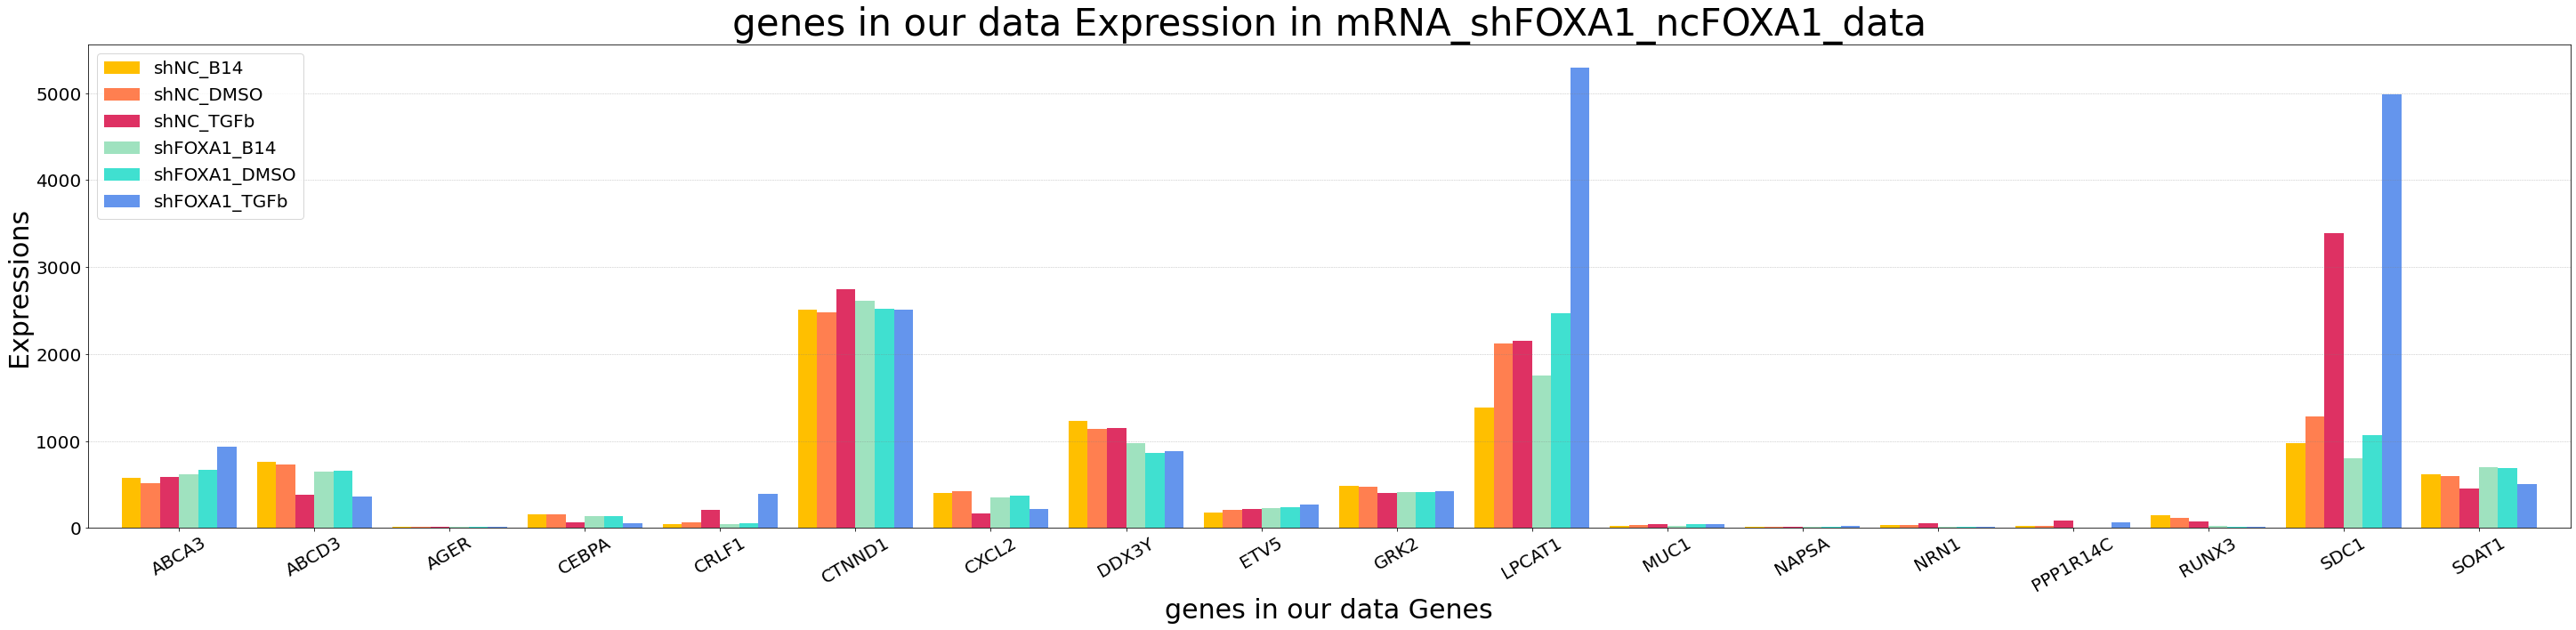

In [15]:
color_list = ['#FFBF00', '#FF7F50', '#DE3163', '#9FE2BF', '#40E0D0', '#6495ED']

ax= df_mean.plot(
    kind='bar', 
    stacked=False,
    figsize=(50,10),
    color=color_list,
    width=0.85,
    zorder=1
    )

plt.legend(prop={'size': 20})
plt.title(gene_list_name + " Expression in mRNA_shFOXA1_ncFOXA1_data",size=42)
plt.xlabel(gene_list_name + " Genes",fontsize=30)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=20)
plt.ylabel("Expressions",fontsize=30)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='grey', alpha=0.5, zorder=0)